In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import  matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('ford.csv') 
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [39]:
df.shape

(17966, 9)

In [40]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [41]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [42]:
data_columns = df.columns 
data_columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [43]:
num_cols = [] 
obj_cols = [] 
for col in data_columns: 
    if df[col].dtype == 'object': 
        obj_cols.append(col)  
    else: 
        num_cols.append(col)        
print("Numeric Columns", num_cols) 
print("Object Columns:", obj_cols)

Numeric Columns ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
Object Columns: ['model', 'transmission', 'fuelType']


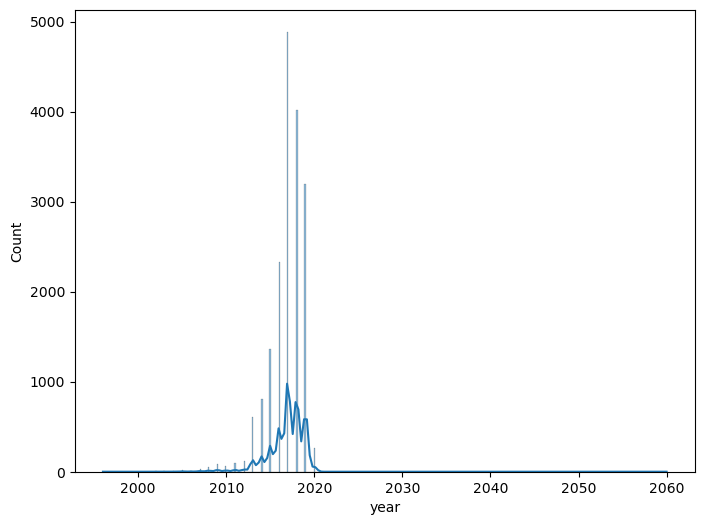

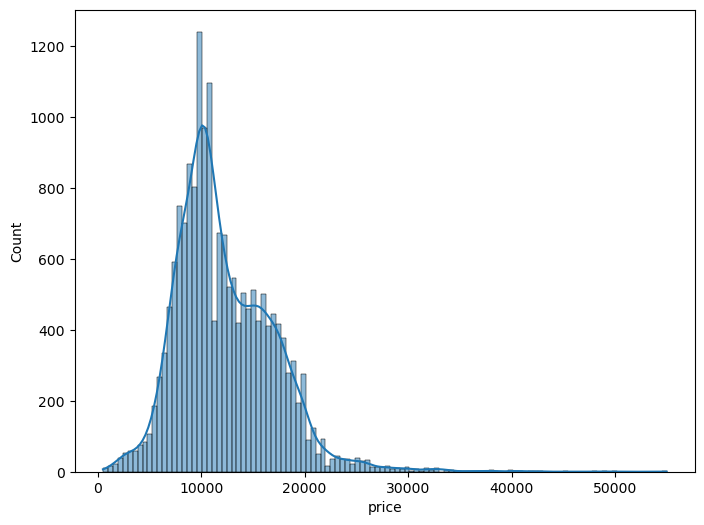

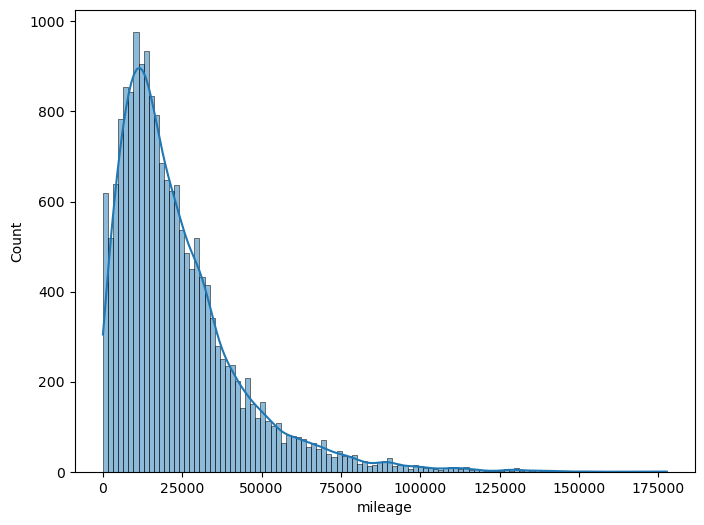

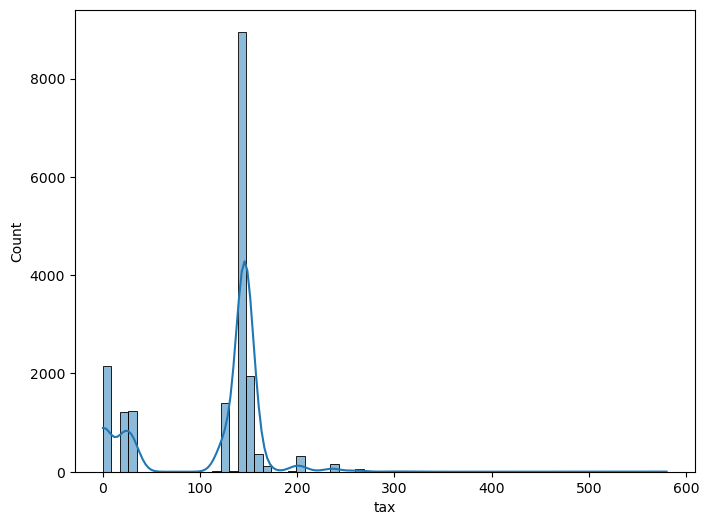

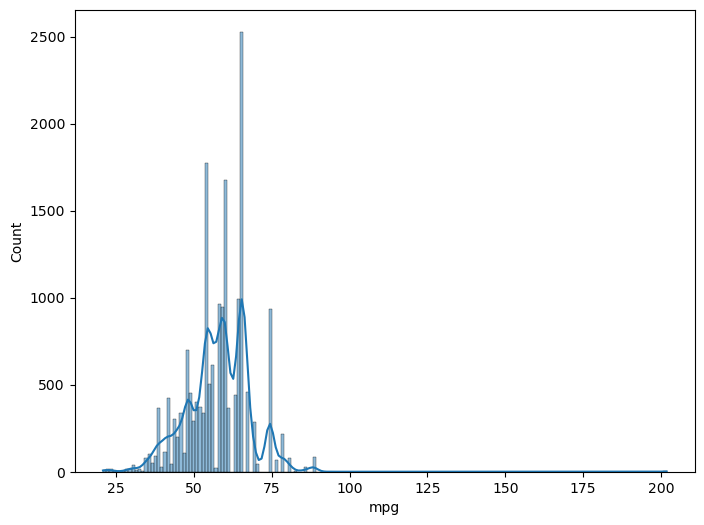

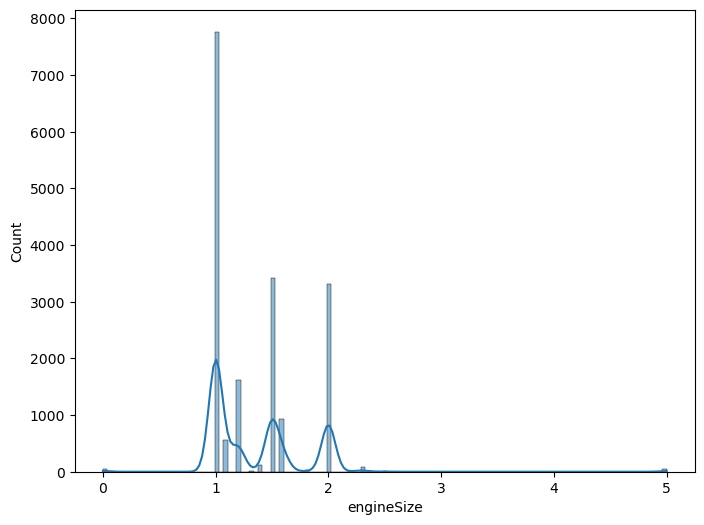

In [44]:
for col in num_cols:
    plt.figure(figsize= (8, 6)) 
    sns.histplot(df[col], kde= True) 
    plt.show()

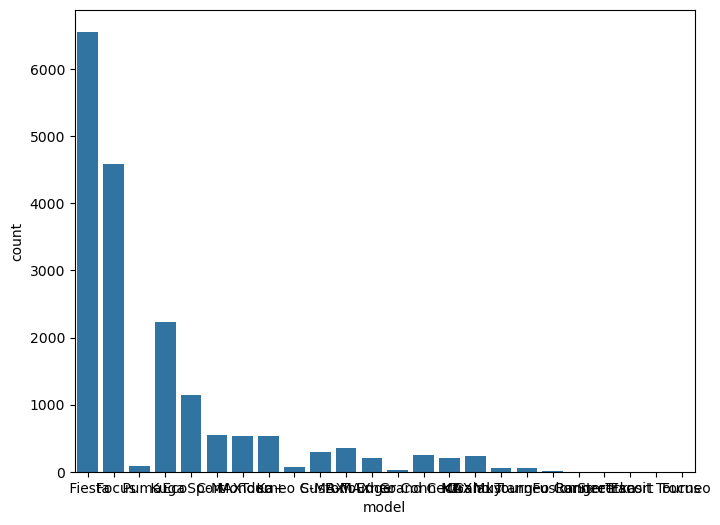

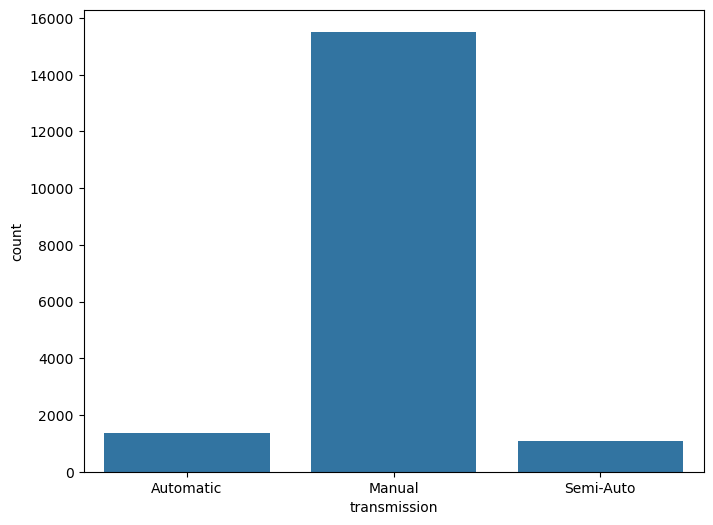

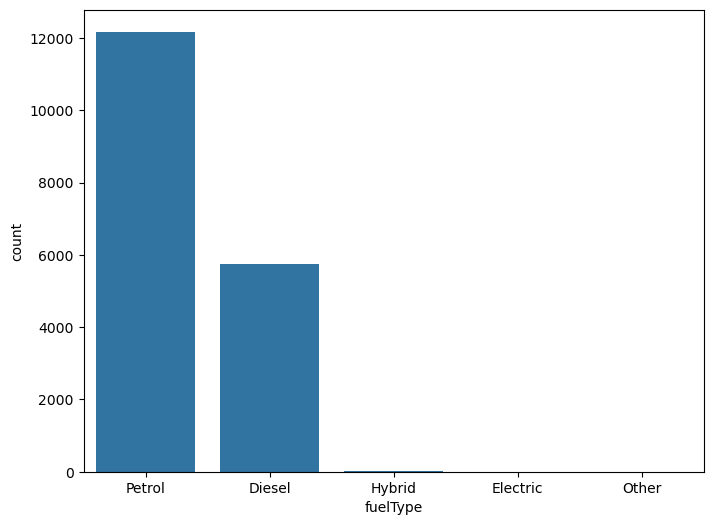

In [45]:
for col in obj_cols: 
    plt.figure(figsize= (8, 6)) 
    sns.countplot(x= df[col])

In [46]:
X = df.drop(['price'], axis= 1) 
y = df['price'] 

In [47]:
from datetime import datetime
current_year = datetime.now().year
X['car_age'] = current_year - X['year'] 
X = X.drop(['year'], axis= 1) 
X

,model,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,Fiesta,Automatic,15944,Petrol,150,57.7,1.0,8
1,Focus,Manual,9083,Petrol,150,57.7,1.0,7
2,Focus,Manual,12456,Petrol,150,57.7,1.0,8
3,Fiesta,Manual,10460,Petrol,145,40.3,1.5,6
4,Fiesta,Automatic,1482,Petrol,145,48.7,1.0,6
...,...,...,...,...,...,...,...,...
17961,B-MAX,Manual,16700,Petrol,150,47.1,1.4,8
17962,B-MAX,Manual,40700,Petrol,30,57.7,1.0,11
17963,Focus,Manual,7010,Diesel,20,67.3,1.6,10
17964,KA,Manual,5007,Petrol,145,57.7,1.2,7


In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Example:
categorical_cols = ['model', 'transmission', 'fuelType']
cols_for_s_scale = ['mileage', 'tax', 'mpg', 'engineSize', 'car_age']

encoders = {}  # to store label encoders

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # save encoder for each column

# Scale numeric columns
scale = StandardScaler()
X[cols_for_s_scale] = scale.fit_transform(X[cols_for_s_scale])

# Save both for future use (important for Streamlit deployment)
joblib.dump(encoders, 'encoders.pkl')
joblib.dump(scale, 'scaler.pkl')

X.head()

,model,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,5,0,-0.380998,4,0.591358,-0.020442,-0.811386,-0.065128
1,6,1,-0.733359,4,0.591358,-0.020442,-0.811386,-0.552866
2,6,1,-0.560132,4,0.591358,-0.020442,-0.811386,-0.065128
3,5,1,-0.662640,4,0.510727,-1.738890,0.345070,-1.040605
4,5,0,-1.123724,4,0.510727,-0.909294,-0.811386,-1.040605


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) 

In [54]:
from xgboost import XGBRegressor
model = XGBRegressor() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
result = pd.DataFrame({"Real": y_test, "Predicted": y_pred}) 
result

,Real,Predicted
17610,6995,7806.210938
7076,8999,9186.836914
1713,7998,8219.475586
1611,5491,6197.036133
16830,3790,3437.017090
...,...,...
7731,22000,20205.851562
11655,13699,12154.580078
10536,24979,23489.628906
11885,10500,9763.305664


In [55]:
print("Training Accuracy:", model.score(X_train, y_train)) 
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.9651506543159485
Testing Accuracy: 0.9384257197380066


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results nicely
print("📊 Regression Model Evaluation Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.3f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.3f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"🔹 R² Score: {r2:.3f}")
print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


📊 Regression Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 804.439
🔹 Mean Squared Error (MSE): 1380006.000
🔹 Root Mean Squared Error (RMSE): 1174.737
🔹 R² Score: 0.938
🔹 Mean Absolute Percentage Error (MAPE): 7.00%


In [57]:
import joblib 
joblib.dump(model, 'model.pkl')

['model.pkl']